In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\Tawla\\Desktop'

In [3]:
import pandas as pd
df=pd.read_csv('Crop_Data.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
895,40,120,197,23.805938,92.488795,5.889481,119.633555,apple
896,25,132,198,22.319441,90.851744,5.732758,100.117344,apple
897,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
898,36,144,196,23.651676,94.505288,6.496934,115.361127,apple


In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
895,40,120,197,23.805938,92.488795,5.889481,119.633555,apple
896,25,132,198,22.319441,90.851744,5.732758,100.117344,apple
897,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
898,36,144,196,23.651676,94.505288,6.496934,115.361127,apple
899,10,140,197,22.169395,90.271856,6.229499,124.468311,apple


In [6]:
# checking for null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.size

7200

In [8]:
df.shape

(900, 8)

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'mothbeans',
       'mungbean', 'banana', 'mango', 'apple'], dtype=object)

In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [12]:
df['label'].value_counts()

rice           100
maize          100
chickpea       100
kidneybeans    100
mothbeans      100
mungbean       100
banana         100
mango          100
apple          100
Name: label, dtype: int64

<AxesSubplot:>

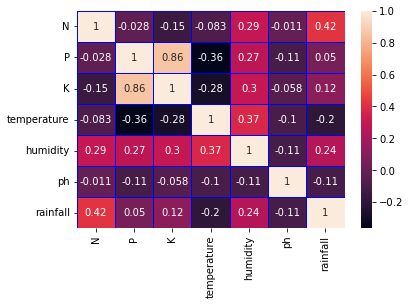

In [13]:
sns.heatmap(df.corr(),annot=True, linewidth=1, linecolor='blue')

In [14]:
#separating features and target label
features=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph','rainfall']]
target=df['label']
labels=df['label']

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaling=MinMaxScaler()

In [17]:
normalize=scaling.fit_transform(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph','rainfall']])
normalize

array([[0.75      , 0.20769231, 0.14736842, ..., 0.83985438, 0.46626364,
        0.64271189],
       [0.70833333, 0.33076923, 0.13684211, ..., 0.81898841, 0.54948026,
        0.73133842],
       [0.5       , 0.30769231, 0.15263158, ..., 0.84379696, 0.67421877,
        0.87073729],
       ...,
       [0.25833333, 0.93846154, 0.95263158, ..., 0.9864273 , 0.45029806,
        0.33519259],
       [0.3       , 0.99230769, 0.95263158, ..., 0.9948527 , 0.46532266,
        0.31550214],
       [0.08333333, 0.96153846, 0.95789474, ..., 0.9423694 , 0.42373299,
        0.34952989]])

In [18]:
#label encoding for output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
df['Encoded_label'] = encod.fit_transform(df.label) #label will be encoded in alphabetical order

In [19]:
#encoded labels for classes 
a = pd.DataFrame(pd.unique(df.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(df.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
classes

,encoded
label,
apple,0
banana,1
chickpea,2
kidneybeans,3
maize,4
mango,5
mothbeans,6
mungbean,7
rice,8


In [20]:
#fetching the label for given encoded value
a=5
for i in range(0,len(classes)):
    if(classes.encoded[i]==a):
        print(classes.index[i].upper())

MANGO


In [21]:
# Initializing empty lists to append all model's name and corresponding name
accuracy = []
model = []

In [22]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [23]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=10)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        26
      banana       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        16
 kidneybeans       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        23
        rice       1.00      1.00      1.00        14

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [24]:
from sklearn.model_selection import cross_val_score
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=100)
score.mean()

0.9977777777777778

Confusion Matrix : 



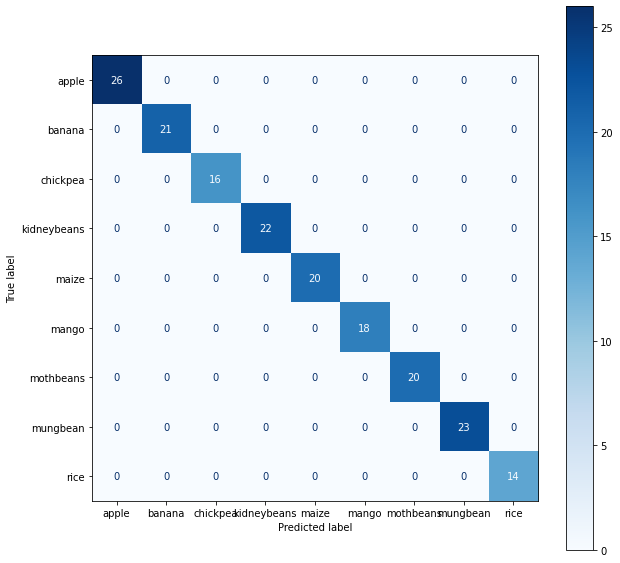

In [25]:
#predicting for test data and plotting confusion matrix
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(DecisionTree,Xtest,Ytest,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [26]:
#Saving trained Decision Tree model
import pickle
# Dump the trained Decision Tree classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=10, random_state=2)

RF.fit(Xtrain,Ytrain)
predicted_values = RF.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9944444444444445
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        26
      banana       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        16
 kidneybeans       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      0.95      0.97        20
    mungbean       1.00      1.00      1.00        23
        rice       1.00      1.00      1.00        14

    accuracy                           0.99       180
   macro avg       1.00      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



In [28]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=100)
score.mean()

0.9988888888888888

In [29]:
#Saving trained Random Forest model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

Confusion Matrix : 



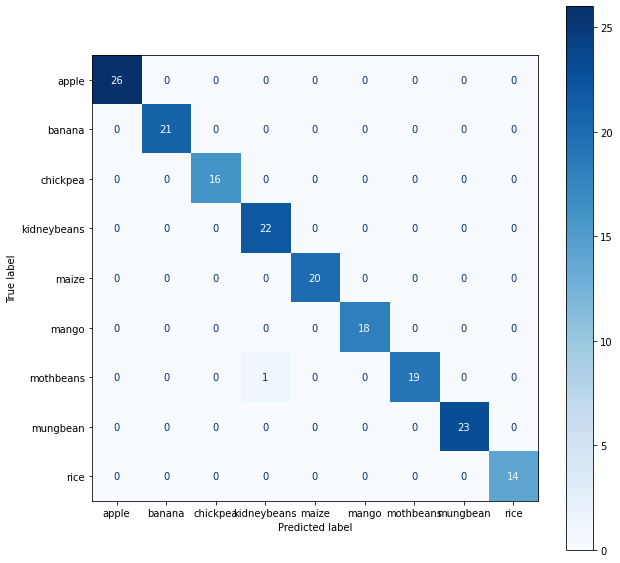

In [30]:
#predicting for test data and plotting confusion matrix
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(RF,Xtest,Ytest,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [31]:
#Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        26
      banana       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        16
 kidneybeans       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        23
        rice       1.00      1.00      1.00        14

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [32]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=100)
score.mean()

1.0

In [33]:
#Saving trained Guassian Naive Bayes model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=4)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        26
      banana       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        16
 kidneybeans       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        23
        rice       1.00      1.00      1.00        14

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [35]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=100)
score.mean()

1.0

In [36]:
#Saving trained Logistic Regression model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [37]:
#Support Vector Machine (SVM)
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.15555555555555556
              precision    recall  f1-score   support

       apple       0.00      0.00      0.00        26
      banana       1.00      0.05      0.09        21
    chickpea       1.00      0.50      0.67        16
 kidneybeans       0.00      0.00      0.00        22
       maize       0.00      0.00      0.00        20
       mango       1.00      0.11      0.20        18
   mothbeans       0.00      0.00      0.00        20
    mungbean       1.00      0.13      0.23        23
        rice       0.08      1.00      0.16        14

    accuracy                           0.16       180
   macro avg       0.45      0.20      0.15       180
weighted avg       0.44      0.16      0.13       180



In [38]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=100)
score.mean()

0.3833333333333334

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Algorithm', ylabel='Accuracy'>

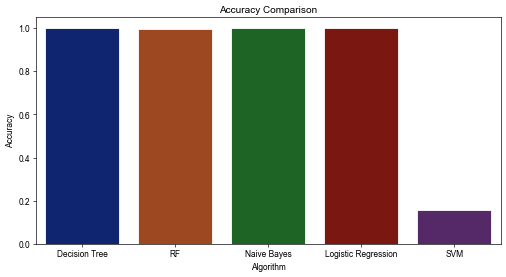

In [39]:
#Accuracy Comparison
plt.figure(figsize=[10,5],dpi = 60)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
sns.set_theme(style="darkgrid")
sns.barplot(y = accuracy,x = model,palette='dark')

In [40]:
accuracy_models = dict(zip(model, accuracy))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 1.0
RF --> 0.9944444444444445
Naive Bayes --> 1.0
Logistic Regression --> 1.0
SVM --> 0.15555555555555556


In [41]:
data = np.array([[60,30,30, 19, 76,6,139]])
prediction = RF.predict(data)
print(prediction)

['mungbean']


In [42]:
data = np.array([[137.5,52.5,52.5, 28, 77.38,6,164.9]])
prediction = RF.predict(data)
print(prediction)

['rice']


In [43]:
data = np.array([[25,50,50, 15, 95,6.5,172]])
prediction = RF.predict(data)
print(prediction)

['rice']


In [44]:
data = np.array([[25,50,50,15, 95,6.5,172]])
prediction = RF.predict(data)
print(prediction)

['rice']
